In [ ]:
%pip install pandas matplotlib

In [139]:
import pandas as pd
import numpy as np

# Read CSV data
df = pd.read_csv('data/Altitude.csv', sep=';')
# Compute total acceleration column as euclidian norm in 3 dimensions
df['acceleration'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)
# Compute vertical velocity as first derivative of height over ground
df['vertical velocity'] = (df['alti'].diff() / df['launch_ts'].diff() * 1000).rolling(20, center=False).mean()

# Assume ground zero is the 30% quantile of all height measurements
# so to exclude extreme values at launch and landing.
df['height_over_ground'] = df['alti'] - df['alti'].quantile(0.3)
# Compute max launch height.
print(df['height_over_ground'].max())

df

46.91089999999997


,launch_ts,ax,ay,az,alti,Unnamed: 5,483.3855,acceleration,vertical velocity,height_over_ground
0,20,-144,-80,944,436.4746,NaN,NaN,958.265099,NaN,0.0000
1,44,-144,-80,960,436.4746,NaN,NaN,974.030800,NaN,0.0000
2,62,-144,-80,944,436.4746,NaN,NaN,958.265099,NaN,0.0000
3,80,-160,-96,976,436.4746,NaN,NaN,993.676004,NaN,0.0000
4,105,-144,-80,960,436.4746,NaN,NaN,974.030800,NaN,0.0000
...,...,...,...,...,...,...,...,...,...,...
4302,87681,-464,16,960,437.1695,NaN,NaN,1066.373293,-0.113846,0.6949
4303,87704,-144,304,912,437.1695,NaN,NaN,972.057611,-0.113846,0.6949
4304,87723,-144,304,912,437.2567,NaN,NaN,972.057611,0.388128,0.7821
4305,87740,-96,448,896,437.1695,NaN,NaN,1006.347852,0.321222,0.6949


In [140]:
# Find launch timestamp: acceleration > 2g
# Find landing timestamp: height_over_ground <3m after launch
hysteresis = 2000 # 2 secs
launch_minus_5s = df[df['acceleration']>2000]['launch_ts'].iloc[0] - hysteresis
landing_plus_5s = df[(df['launch_ts'] > launch_minus_5s + 2*hysteresis) & (df['height_over_ground'] < 3)]['launch_ts'].iloc[0] + hysteresis

print(launch_minus_5s, landing_plus_5s)

subset = df[(df['launch_ts'] >= launch_minus_5s) & (df['launch_ts'] <= landing_plus_5s)]


5460 15733


Text(10244.0, 46.91089999999997, 'Max: 46.9m')

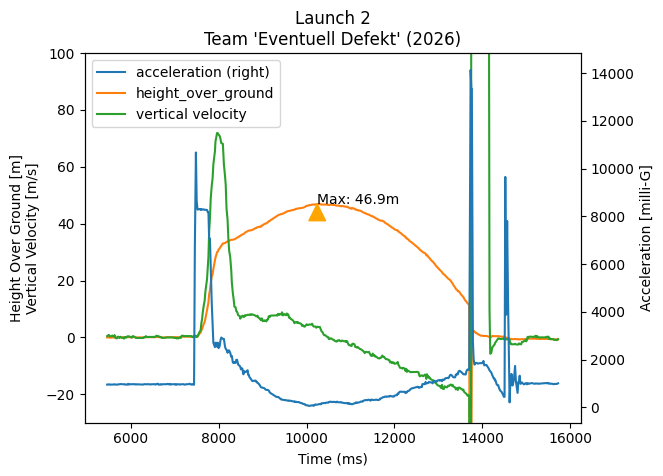

In [141]:
ax = subset.plot(x='launch_ts', y=['acceleration', 'height_over_ground', 'vertical velocity'], secondary_y='acceleration')
ax.set_ylim(-30, 100)  # clamp low altitude value measured on impact
ax.set_title("Launch 2\nTeam 'Eventuell Defekt' (2026)")

# Add axis labels
ax.set_ylabel('Height Over Ground [m]\nVertical Velocity [m/s]')
ax.right_ax.set_ylabel('Acceleration [milli-G]')
ax.set_xlabel("Time (ms)")

# Annotate max altitude
max_idx = subset['height_over_ground'].idxmax()
max_ts = subset.loc[max_idx]['launch_ts']
max_height = subset['height_over_ground'].max()
ax.annotate(text=f'Max: {max_height:.1f}m', xy=(max_ts, max_height), arrowprops={'width':3, 'color':'orange'})

